In [2]:
from utils import prepare_jupyter
prepare_jupyter()

In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from data import BINARY_CLASS_SETS


# BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/experiments-10-08'
BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/rank-08-09'
NAMES = ['bagging', 'adaboost', 'randomforest', 'lgb', 'catboost', 'xgboost']

def get_path(name):
    return os.path.join(BASE_DIR, f'{name}experiment-ensemble.csv')

def get_all_paths():
    return [get_path(name) for name in NAMES]

In [44]:
dfs = [(name, pd.read_csv(path)) for name, path in zip(NAMES, get_all_paths())]
dataset_names = [name for (name, _) in BINARY_CLASS_SETS]

results = []

for estimator_name, df in dfs:
    for group_id, group in df.groupby(['n_estimators', 'dataset_name']):
        acc = group['accuracy']
        avg_acc = acc.mean()
        best_acc = acc.max()
        
        results.append((f'{estimator_name}_{group_id[0]}',
                        group_id[1],
                        best_acc,
                        avg_acc))
        
result_df = pd.DataFrame(data=results, columns=['estimator', 'dataset', 'best_acc', 'avg_acc'])
result_df.head(n=100)

table = pd.pivot_table(result_df, values='best_acc', index=['dataset'], columns=['estimator'])
table

estimator,adaboost_10,adaboost_100,adaboost_50,bagging_10,bagging_100,bagging_50,catboost_10,catboost_100,catboost_50,lgb_10,lgb_100,lgb_50,randomforest_10,randomforest_100,randomforest_50,xgboost_10,xgboost_100,xgboost_50
dataset,,,,,,,,,,,,,,,,,,
SPECT,0.962264,0.962264,0.962264,0.886792,0.867925,0.867925,0.962264,0.943396,0.943396,0.943396,0.924528,0.905660,0.886792,0.886792,0.867925,0.867925,0.924528,0.924528
boston,0.881188,0.901961,0.901961,0.910891,0.900990,0.910891,0.910891,0.891089,0.960396,0.871287,0.891089,0.891089,0.930693,0.920792,0.930693,0.891089,0.881188,0.881188
cmc,0.741497,0.748299,0.748299,0.867347,0.846939,0.850340,0.748299,0.755102,0.761905,0.812925,0.782313,0.789116,0.860544,0.850340,0.860544,0.833333,0.809524,0.812925
flags,0.794872,0.794872,0.769231,0.794872,0.769231,0.794872,1.000000,0.794872,0.794872,0.717949,0.717949,0.743590,0.846154,0.794872,0.820513,0.743590,0.769231,0.769231
glass,0.930233,0.928571,0.928571,0.906977,0.860465,0.860465,0.860465,0.953488,0.906977,0.860465,0.904762,0.904762,0.906977,0.930233,0.906977,0.833333,0.860465,0.860465
ionosphere,0.985714,0.985714,0.985714,0.971429,0.971429,0.971429,0.971429,0.971429,1.000000,0.971429,0.971429,0.971429,0.985714,0.971429,0.971429,0.942857,0.971429,0.971429
isolet,0.991667,0.991667,0.991667,0.991667,0.991667,0.991667,0.991667,1.000000,0.991667,0.991667,1.000000,0.991667,1.000000,1.000000,1.000000,0.991667,0.991667,0.991667
lymph,1.000000,0.966667,1.000000,0.966667,0.933333,0.933333,0.900000,1.000000,0.966667,0.833333,0.933333,0.900000,0.965517,0.966667,0.966667,0.900000,0.933333,0.933333
oil_spill,0.983957,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610,0.978610


In [93]:
all_values = table.values
all_values = np.rollaxis(all_values, axis=1)

all_ranks = []
for values in all_values:
    order = np.flip(values.argsort())
    ranks = order.argsort()
    all_ranks.append(ranks)
    
all_ranks = np.array(all_ranks)
# print(all_ranks)

sum_scores = all_ranks.sum(axis=0)

print('SUM SCORES')
for s, e in zip(sum_scores, result_df['estimator'].unique()):
    print(f'{s} = {e}')
print()
    
avg_scores = np.median(all_ranks, axis=0)
print('AVG SCORES')
for s, e in zip(avg_scores, result_df['estimator'].unique()):
    print(f'{s} = {e}')
print()

SUM SCORES
175 = bagging_10
190 = bagging_50
238 = bagging_100
236 = adaboost_10
195 = adaboost_50
103 = adaboost_100
52 = randomforest_10
136 = randomforest_50
98 = randomforest_100
125 = lgb_10
51 = lgb_50
42 = lgb_100
273 = catboost_10
284 = catboost_50
122 = catboost_100
54 = xgboost_10
74 = xgboost_50

AVG SCORES
10.0 = bagging_10
11.0 = bagging_50
13.0 = bagging_100
14.0 = adaboost_10
11.0 = adaboost_50
5.5 = adaboost_100
3.0 = randomforest_10
8.0 = randomforest_50
6.0 = randomforest_100
9.0 = lgb_10
2.0 = lgb_50
2.0 = lgb_100
15.0 = catboost_10
16.0 = catboost_50
6.0 = catboost_100
3.0 = xgboost_10
3.5 = xgboost_50



## Wielkość drzew

In [85]:
BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/rank-06-09'

def get_path(name):
    return os.path.join(BASE_DIR, f'{name}experiment-ensemble.csv')

def get_all_paths():
    return [get_path(name) for name in NAMES]

In [86]:
dfs = [(name, pd.read_csv(path, index_col=0)) for name, path in zip(NAMES, get_all_paths())]
dfs[0][1].head(n=1)

,accuracy,attributes_ratio,dataset,ensemble_accuracy,max_depth,n_estimators,name,num_nodes,repetition,tree_id
0,0.740741,0.772727,SPECT,0.740741,6,10,Bagging,43,0,0


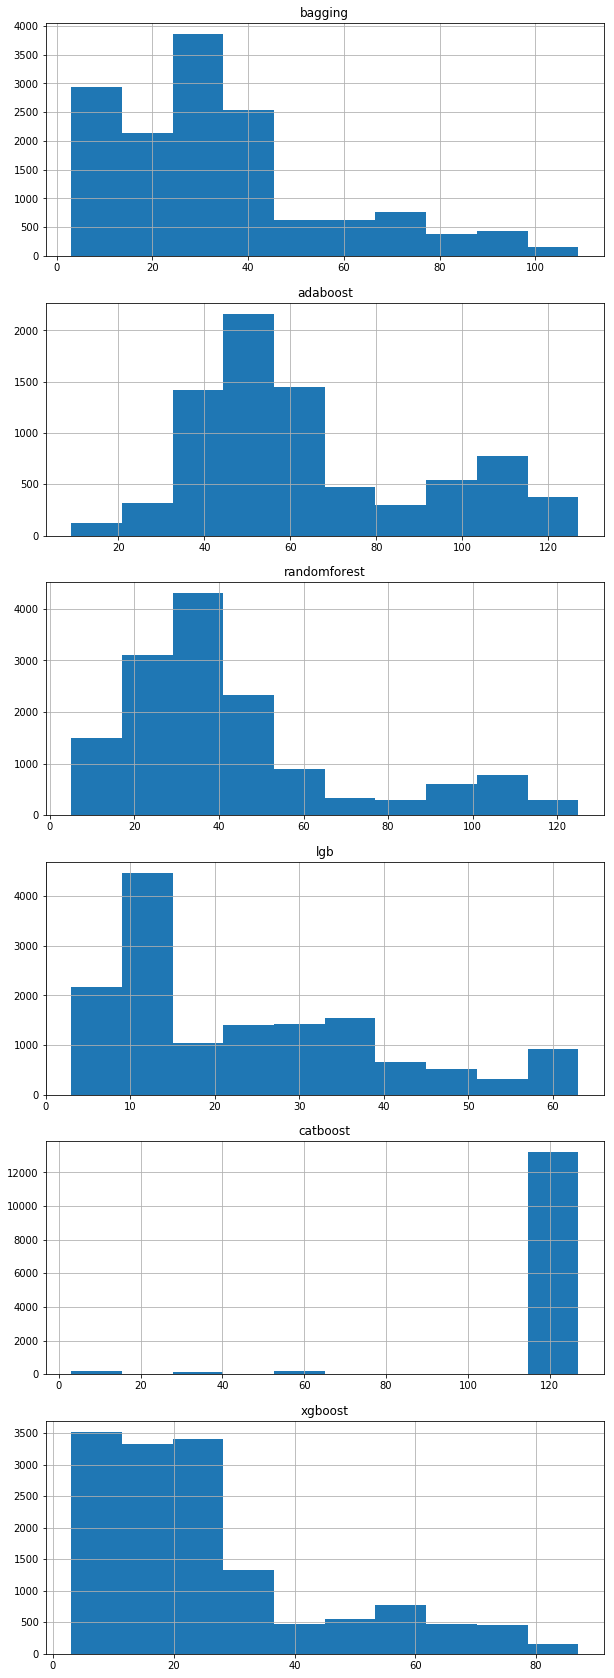

In [83]:
fig, axes = plt.subplots(nrows=len(dfs), ncols=1, figsize=(10, 30))
for ax, df in zip(axes.flat, dfs):
    num_nodes = df[1]['num_nodes']
    ax.set_title(df[0])
    num_nodes.hist(ax=ax)

In [ ]:
fig, axes = plt.subplots(nrows=len(dfs), ncols=1, figsize=(10, 30))
for ax, df in zip(axes.flat, dfs):
    num_nodes = df[1]['num_nodes']
    ax.set_title(df[0])
    num_nodes.hist(ax=ax)